In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np

2024-10-11 19:33:53.818865: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-11 19:33:53.843713: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-11 19:33:53.849821: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-11 19:33:53.864417: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
tf.keras.backend.clear_session()

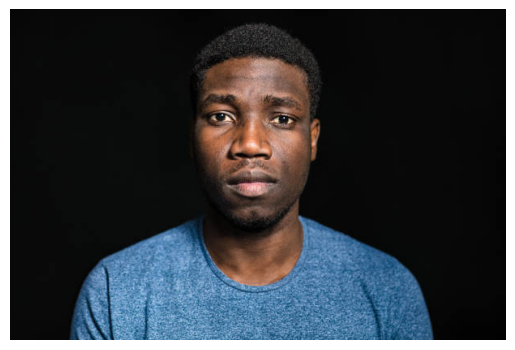

I0000 00:00:1728675238.763097   15112 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728675238.770265   15112 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728675238.770317   15112 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728675238.773160   15112 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728675238.773201   15112 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

In [3]:

read_img = cv2.imread("sad_guy.jpg")
if read_img is None:
    raise ValueError("Image not found or unable to read.")

read_img = cv2.cvtColor(read_img, cv2.COLOR_BGR2RGB)
plt.imshow(read_img)
plt.axis('off')
plt.show()

# Convert the image to a TensorFlow tensor and resize it
resize = tf.image.resize(tf.convert_to_tensor(read_img, dtype=tf.float32), (128, 128))

resize = resize.numpy() / 255.0

In [4]:
class_mapping = {
    0: 'angry',
    1: 'disgusted',
    2: 'happy',
    3: 'sad',
    4: 'shocked'
}

In [5]:
loaded_model = tf.keras.models.load_model("../models/5_classes_emotions_model.keras")

In [6]:
#expand the dim of the image for the batch (256.256.3) to (1.256.256.3) , axis = 0 means it will be at the start
processed_image = np.expand_dims(resize, axis=0)

yhat=loaded_model.predict(processed_image)
predicted_class = np.argmax(yhat)
print(f'Image: "angry man" , Prediction: {class_mapping.get(predicted_class, "UNKNOWN")}, Probabilities: {yhat}')


I0000 00:00:1728675239.556705   15173 service.cc:146] XLA service 0x7f72ec006850 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728675239.556763   15173 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3050, Compute Capability 8.6
2024-10-11 19:33:59.566560: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-11 19:33:59.632387: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8906


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Image: "angry man" , Prediction: sad, Probabilities: [[1.8420885e-04 1.1047088e-04 5.3642406e-03 9.9428785e-01 5.3178024e-05]]


I0000 00:00:1728675240.648021   15173 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [7]:
# Create a dummy label for evaluation (assuming a multi-class classification, replace with actual if available)
dummy_label = np.array([[0, 0, 0, 1, 0]])  # Adjust based on your class mapping

# Evaluate the model
loss, accuracy = loaded_model.evaluate(processed_image, dummy_label, verbose=1)
# Output results
print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 666ms/step - accuracy: 1.0000 - loss: 0.0057
Loss: 0.0057
Accuracy: 1.0000
